In [16]:
import numpy as np
import matplotlib.pyplot as plt

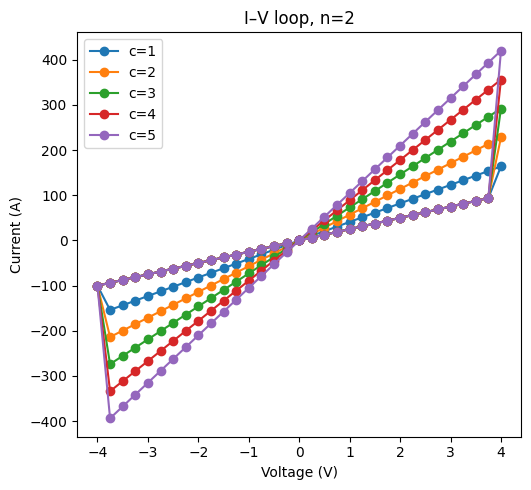

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def memristor_dc_sweep(V, c, n, Vth, G_init):
   
    G = np.zeros_like(V, dtype=float)
    I = np.zeros_like(V, dtype=float)
    G[0] = G_init

    for k in range(1, len(V)):
        v = V[k]
        g_prev = G[k-1]

        # thresholded update for conductance
        if v >= Vth:
            g_new = g_prev + c * (abs(v) ** n)
        elif v <= -Vth:
            g_new = g_prev - c * (abs(v) ** n)
        else:
            g_new = g_prev

        G[k] = g_new
        I[k] = g_new * v     # Ohm's law: I = G * V

    # also compute I,G at the first point
    I[0] = G[0] * V[0]
    return G, I


V = np.concatenate([np.arange(0, 4, 0.25), np.arange(4, 0, -0.25), np.arange(0, -4, -0.25), np.arange(-4, 0, 0.25)])


n = 2       

c_values = [1, 2, 3, 4, 5]      #Random values of c used in the test case

results = {}
for c in c_values:
    G, I = memristor_dc_sweep(V, c=c, n=n, Vth=4.0, G_init=25.0)
    results[c] = (G, I)

plt.figure(figsize=(10, 5))

# I-V hysteresis 
plt.subplot(1, 2, 1)
for c in c_values:
    G, I = results[c]
    plt.plot(V, I, marker='o', label=f"c={c}")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (A)")
plt.title(f"I–V loop, n={n}")
plt.legend()

plt.tight_layout()
plt.show()

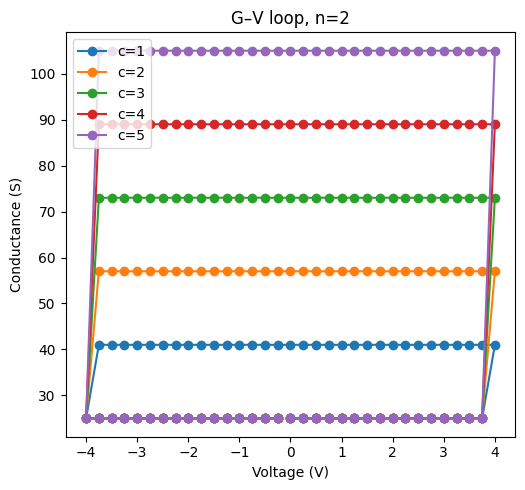

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def memristor_dc_sweep(V, c, n, Vth=1.0, G_init=100.0):
   
    G = np.zeros_like(V, dtype=float)
    I = np.zeros_like(V, dtype=float)
    G[0] = G_init

    for k in range(1, len(V)):
        v = V[k]
        g_prev = G[k-1]

        # thresholded update for conductance
        if v >= Vth:
            g_new = g_prev + c * (abs(v) ** n)
        elif v <= -Vth:
            g_new = g_prev - c * (abs(v) ** n)
        else:
            g_new = g_prev

        G[k] = g_new
        I[k] = g_new * v     # Ohm's law: I = G * V

    # also compute I,G at the first point
    I[0] = G[0] * V[0]
    return G, I


V = np.concatenate([np.arange(0, 4, 0.25), np.arange(4, 0, -0.25), np.arange(0, -4, -0.25), np.arange(-4, 0, 0.25)])


n = 2   

c_values = [1, 2, 3, 4, 5]      #Random values of c taken in the test case

results = {}
for c in c_values:
    G, I = memristor_dc_sweep(V, c=c, n=n, Vth=4.0, G_init=25.0)
    results[c] = (G, I)

plt.figure(figsize=(10, 5))

# G-V hysteresis 
plt.subplot(1, 2, 2)
for c in c_values:
    G, I = results[c]
    plt.plot(V, G, marker='o', label=f"c={c}")
plt.xlabel("Voltage (V)")
plt.ylabel("Conductance (S)")
plt.title(f"G–V loop, n={n}")
plt.legend()

plt.tight_layout()
plt.show()